<a href="https://colab.research.google.com/github/rcarasek/Python-for-Investment/blob/main/PyForInvest_Colab_aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando blibliotecas

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override() 

     |████████████████████████████████| 6.3MB 12.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=de7fa58b25d85af9e5dd43cf1d4f6b0a1309ec5041202cc62b477bf709631662
  Stored in directory: /tmp/pip-ephem-wheel-cache-j1wz8ai8/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

### *2*. Obtendo dados

In [3]:
ativos = ['ITSA4.SA', 'VALE3.SA', 'GGBR4.SA', 'BBAS3.SA']
carteira = web.get_data_yahoo(ativos, period='3y')['Adj Close']
ibov = web.get_data_yahoo('^BVSP', period = '3y')['Adj Close']    

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
carteira.head(4)

,BBAS3.SA,GGBR4.SA,ITSA4.SA,VALE3.SA
Date,,,,
2018-05-03,29.902437,15.518825,9.801414,42.694458
2018-05-04,29.842636,15.848212,9.643962,43.224991
2018-05-07,29.808456,15.396482,9.659701,42.824921
2018-05-08,30.620096,15.368247,9.683323,42.781429


### 3. resultados

In [5]:
sns.set()

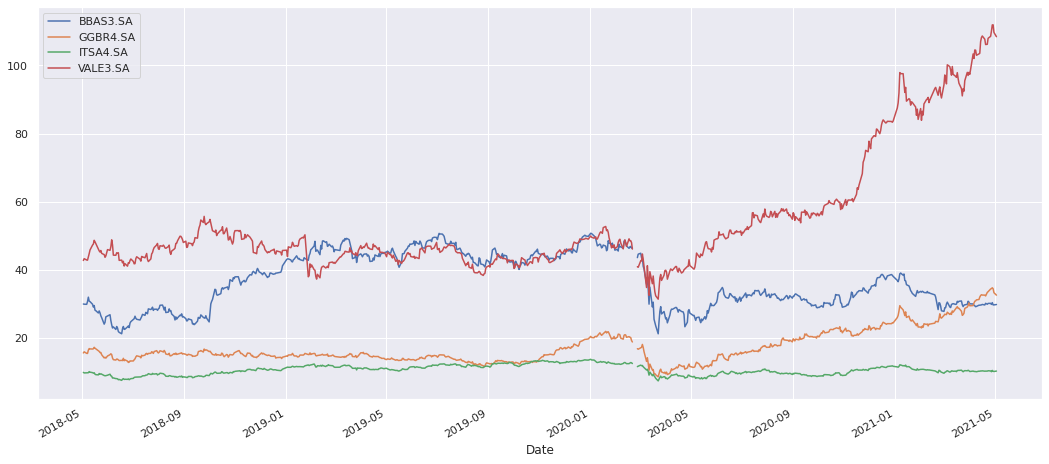

In [6]:
carteira.plot(figsize=(18,8))

carteira_normalizada ==> todas as ações partem do 1

In [13]:
carteira_normalizada = (carteira / carteira.iloc[0])*100
carteira_normalizada.head(4)

,BBAS3.SA,GGBR4.SA,ITSA4.SA,VALE3.SA
Date,,,,
2018-05-03,100.000000,100.000000,100.000000,100.000000
2018-05-04,99.800013,102.122504,98.393582,101.242627
2018-05-07,99.685709,99.211647,98.554166,100.305573
2018-05-08,102.400002,99.029710,98.795167,100.203706


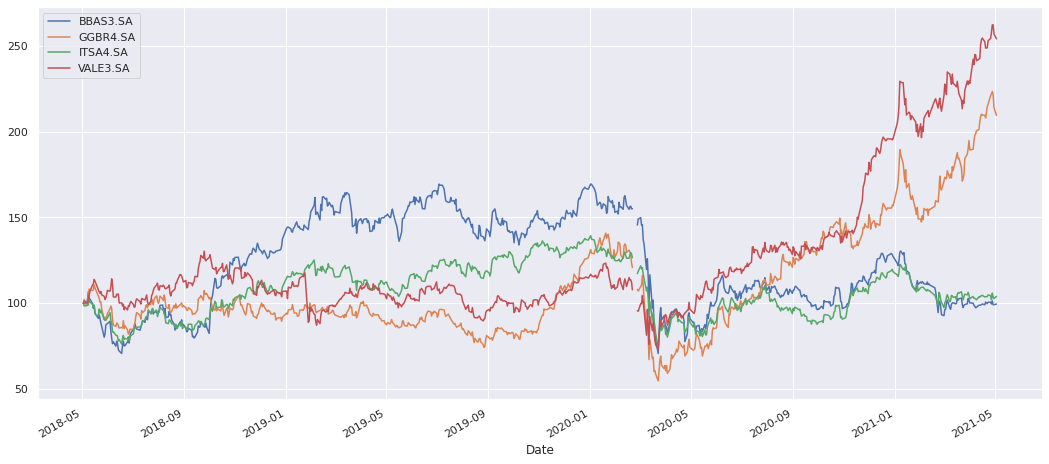

In [14]:
carteira_normalizada.plot(figsize=(18,8))

In [15]:
carteira_normalizada['saldo'] = carteira_normalizada.sum(axis=1)

In [17]:
carteira_normalizada.head(3)

,BBAS3.SA,GGBR4.SA,ITSA4.SA,VALE3.SA,saldo
Date,,,,,
2018-05-03,100.000000,100.000000,100.000000,100.000000,400.000000
2018-05-04,99.800013,102.122504,98.393582,101.242627,401.558726
2018-05-07,99.685709,99.211647,98.554166,100.305573,397.757095


In [24]:
ibov_normalizado = (ibov / ibov.iloc[0])*400
ibov_normalizado.head(3)

Date
2018-05-03    400.000000
2018-05-04    399.183556
2018-05-07    397.243300
Name: Adj Close, dtype: float64

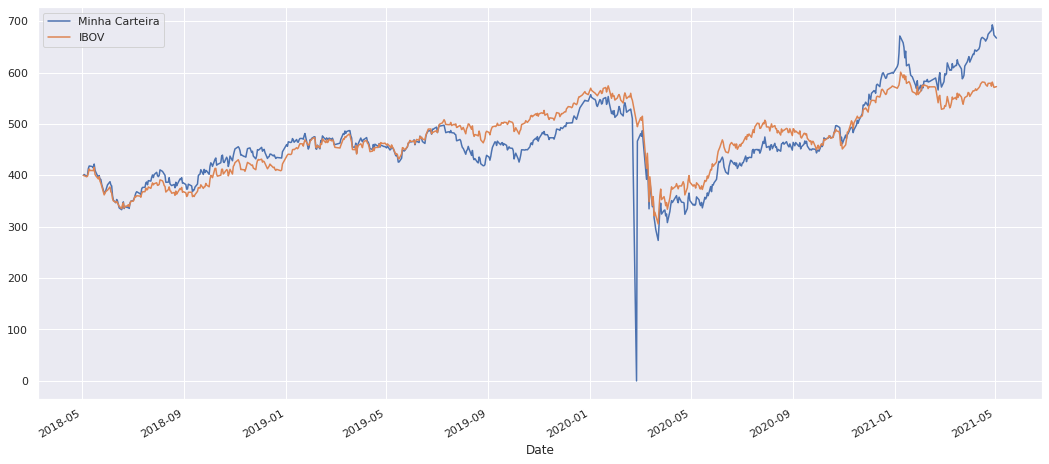

In [27]:
carteira_normalizada['saldo'].plot(figsize=(18,8), label='Minha Carteira')
ibov_normalizado.plot(label='IBOV')
plt.legend()
